In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Market Value Model 

In [2]:
value_all_players = pd.read_csv("upd_pldata.csv")
value_all_data = value_all_players.dropna()

In [3]:
value_all_players.columns = value_all_players.columns.str.replace('.', '_')
value_all_players.columns = value_all_players.columns.str.replace('___', '_')
value_all_players.columns = value_all_players.columns.str.replace(' ', '_')

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_37953/1519655258.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  value_all_players.columns = value_all_players.columns.str.replace('.', '_')


In [4]:
value_all_players.shape

(5700, 59)

In [12]:
type(value_all_players["Years_Left"][0]

numpy.int64

## Preliminary Vizualizations

In [6]:
final_value_all_players = pd.DataFrame(value_all_players, columns = ["Name"])
final_value_all_players["actual"] = value_all_players['Value'].copy()

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_37953/4109060922.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=value_all_data, x="Age", y="Value", ci = False)


<AxesSubplot: xlabel='Age', ylabel='Value'>

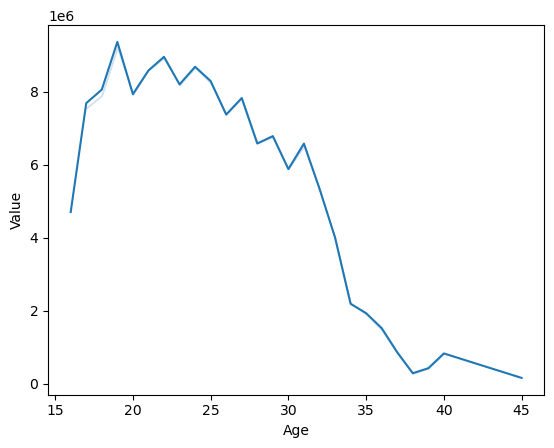

In [7]:
sns.lineplot(data=value_all_data, x="Age", y="Value", ci = False)

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_37953/2808091260.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=value_all_data, x="Potential", y="Value", ci = False)


<AxesSubplot: xlabel='Potential', ylabel='Value'>

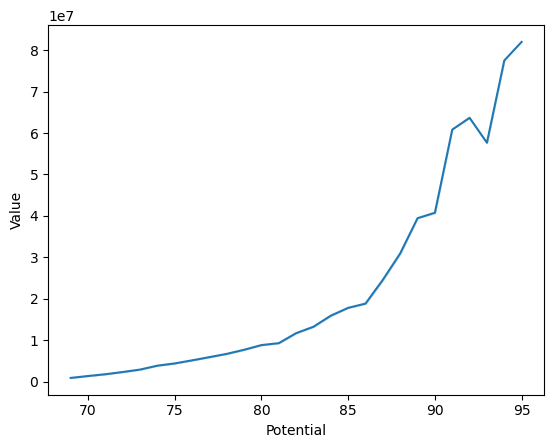

In [8]:
sns.lineplot(data=value_all_data, x="Potential", y="Value", ci = False)

In [18]:
#sns.barplot(data=value_all_data, x=(value_all_data["Years_Left"]), y="Value")

KeyError: 'Years_Left'

In [ ]:
from sklearn.model_selection import train_test_split
value_all_train, value_all_test = train_test_split(value_all_players, test_size = .2, shuffle = True)

#final_value_all_players = pd.DataFrame(at_test, columns = ["Name"])
#final_value_all_players["actual"] = at_test['Value'].copy()


#getting the target vector and deleting it from feature matrix

X_train_value = value_all_train.dropna(how='any', inplace=True)
X_train_value = value_all_train.drop(["Value"], axis = 1)
y_train_value = value_all_train["Value"]



X_test_value = value_all_test.dropna(how='any', inplace=True)
X_test_value = value_all_test.drop(["Value"], axis = 1)
y_test_value = value_all_test["Value"]

X_train_value = X_train_value.drop(["field_position"], axis = 1)
X_train_value = X_train_value.drop(["Name"], axis = 1)




X_test_value = X_test_value.drop(["field_position"], axis = 1)
X_test_value = X_test_value.drop(["Name"], axis = 1)

# print(X_train_value_all)
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train_value_all = sc.fit_transform(X_train_value_all)
#y_train_value_all = sc.fit_transform(y_train_value_all)

#X_test_value_all = sc.fit_transform(X_test_value_all)
#y_test_value_all = sc.fit_transform(y_test_value_all)

In [ ]:
#X_train_value_all.dropna(how='any', inplace=True)

In [ ]:
X_train_value.columns

## Feature Selection

In [340]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train_value, y_train_value)
mutual_info

array([0.4905856 , 1.03841895, 1.05968144, 0.07246043, 0.20571659,
       0.35662188, 2.27805299, 0.17748061, 0.07192862, 0.09929788,
       0.0547768 , 0.21217571, 0.06703996, 0.14562138, 0.24314665,
       0.07669758, 0.02859152, 0.10846393, 0.30271662, 0.07794648,
       0.0932485 , 0.08023595, 0.04050479, 0.37264494, 0.05031291,
       0.09875495, 0.0744433 , 0.01151016, 0.07537393, 0.01365796,
       0.10309282, 0.12301613, 0.02014485, 0.16093953, 0.16626519,
       0.14282174, 0.04919805, 0.19878933, 0.21252084, 0.13281367,
       0.18756584, 0.16174314, 0.06511414, 0.03866179, 0.05858453,
       0.01639181, 0.040265  , 0.06966433, 0.01257774, 0.12304478,
       0.06456738, 0.16737898, 0.17501522, 0.25705098, 0.19539382,
       0.06036168])

In [341]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_value.columns
ordered_mutual_info = mutual_info.sort_values(ascending=False)

<AxesSubplot: >

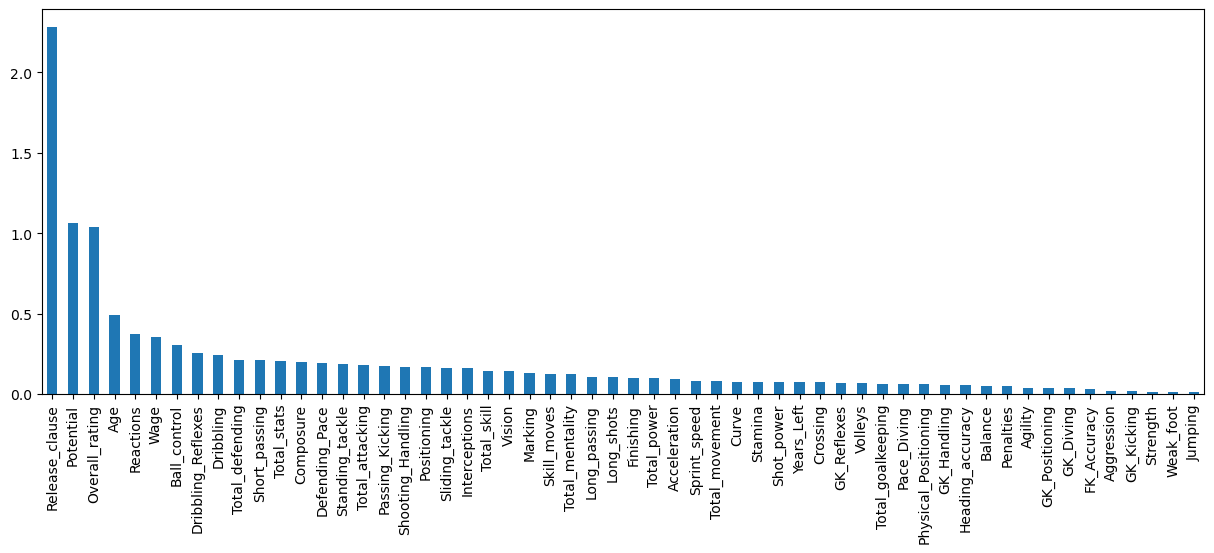

In [342]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [343]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=30)
selected_top_columns.fit(X_train_value, y_train_value)
selected_top_columns.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False])

In [344]:
X_train_value.columns[selected_top_columns.get_support()]

Index(['Age', 'Overall_rating', 'Potential', 'Total_stats', 'Wage',
       'Release_clause', 'Total_attacking', 'Short_passing', 'Dribbling',
       'Ball_control', 'Reactions', 'Composure', 'Total_defending',
       'Standing_tackle', 'Passing_Kicking', 'Dribbling_Reflexes',
       'Defending_Pace'],
      dtype='object')

In [345]:
X_train_value_sel = X_train_value[['Age', 'Overall_rating', 'Potential', 'Total_stats', 'Wage',
       'Release_clause', 'Total_attacking', 'Short_passing', 'Dribbling',
       'Ball_control', 'Reactions', 'Positioning', 'Composure',
       'Total_defending', 'Passing_Kicking', 'Dribbling_Reflexes',
       'Defending_Pace']]


X_test_value_sel = X_test_value[['Age', 'Overall_rating', 'Potential', 'Total_stats', 'Wage',
       'Release_clause', 'Total_attacking', 'Short_passing', 'Dribbling',
       'Ball_control', 'Reactions', 'Positioning', 'Composure',
       'Total_defending', 'Passing_Kicking', 'Dribbling_Reflexes',
       'Defending_Pace']]

In [346]:
from sklearn.linear_model import Ridge
Lol8 = Ridge(alpha = 1, max_iter = 4000)

Lol8.fit(X_train_value, y_train_value)

/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.250e+15, tolerance: 3.141e+13
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1, max_iter=4000)

In [347]:
Lol8.score(X_test_value, y_test_value)

0.9889101634883111

In [348]:
Lol8.coef_

array([-4.89896798e+04,  1.99150424e+05, -8.22212454e+04, -5.77791666e+04,
        1.01001478e+04,  6.93711277e+00,  4.78280413e-01, -1.42469872e+04,
       -9.73989659e+02,  1.91759081e+02, -2.13329070e+03, -6.71862731e+03,
        1.31601786e+04, -1.11203286e+04, -4.04781910e+03, -1.33782802e+03,
        3.80500853e+03,  8.08916249e+03,  4.42096394e+03, -1.51117763e+04,
       -5.66958459e+03, -1.62049374e+03,  8.00588928e+03,  7.14058959e+03,
        7.42360748e+03, -8.86135425e+03, -2.40304417e+03, -1.06838072e+03,
        6.26928005e+03, -2.01859946e+03, -7.62299964e+02, -1.29521772e+04,
       -5.22172711e+03,  4.31526456e+02,  2.35974917e+03,  1.87252251e+03,
        4.40857685e+03, -1.08335467e+03, -1.69755669e+04,  3.99748753e+03,
       -6.17286288e+03,  1.89737667e+03, -1.72270551e+04,  8.77930846e+02,
       -4.89865686e+03,  3.21354591e+03, -2.25750416e+02,  5.29732821e+03,
        1.33949381e+04,  5.11842697e+03,  1.22568680e+04, -9.46980129e+03,
        4.27575703e+03,  

In [349]:
from sklearn.ensemble import RandomForestRegressor

In [350]:
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train_value, y_train_value)

RandomForestRegressor(max_depth=5, random_state=0)

In [351]:
regr.score(X_test_value, y_test_value)

0.987896994481562

In [358]:
#cross-validation
import time as tm
start = tm.time()

from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(regr, X_train_value, y_train_value, cv=5)
print(model_scores.mean())


running_secs = (tm.time() - start)



0.9794776578342885


In [359]:
print(running_secs)

14.303798198699951


In [360]:
#cross-validation
import time as tm
start = tm.time()

from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(regr, X_train_value_sel, y_train_value, cv=5)
print(model_scores.mean())

running_secs = (tm.time() - start)

0.981009669685089


In [361]:
print(running_secs)

4.912126064300537


Take-Away: Big Computational Efficiency Difference with decreased # of features 

## Experiments

Notes: time to run might take longer with more features even though accuracy doesn't change; vary the # of samples and see how that affects the learning curves

In [354]:
#all features time to run vs. feature selection time to run

In [255]:
X_train_value.iloc[:, 0:3] #get all rows for certain columns; use this in the loop, but no b/cuz we need to go from most important to least important

,Age,Overall_rating,Potential
2076,26,75,77
3664,24,72,74
4226,28,71,72
1751,24,75,79
1882,29,75,75
...,...,...,...
40,24,87,92
657,27,79,79
2779,20,73,84
4172,29,71,71


In [320]:
((ordered_mutual_info).index[0]) #use this to loop

#X_train_value.iloc[:, 0:ordered_mutual_info.index[0]]

'Release_clause'

In [375]:
import warnings
warnings.filterwarnings('ignore')

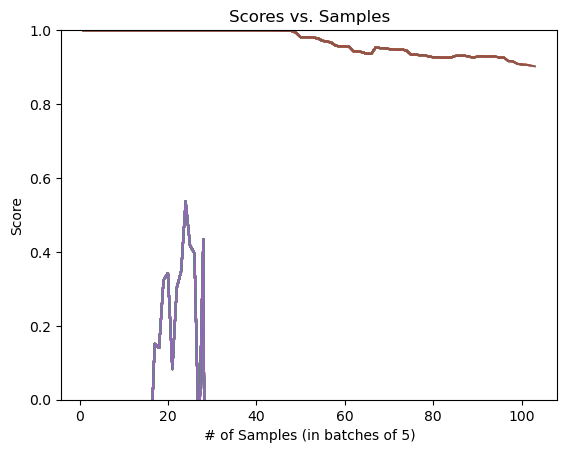

In [399]:
#effect of overfitting, keeping # features constant and increasing samples (good for when we get new dataset);

#effect of overfitting, keeping # samples constant and increasing features (good for when we get new dataset);


#initialize arrays to store scores
train_score_hist = []
cv_score_hist = []


#loop through features:
for i in range(1, len(ordered_mutual_info)):
    #fit on training; I don't think I should refit everytime!!!!!
    L6 = Lasso(alpha = 1) 
    L6.fit(X_train_value.iloc[:, 0:ordered_mutual_info.index[i]], y_train_value.iloc[0:i])
    
    #score on training
    #print(L6.score(X_train_fee.iloc[0:i],y_train_fee.iloc[0:i]))
    train_score_hist.append(L6.score(X_train_fee.iloc[:, 0:i],y_train_value.iloc[:, 0:i]))  #update model's training score
    
    #cross-validation
    cv_score_hist.append(cross_val_score(L6, X_train_fee.iloc[0:i], y_train_fee.iloc[0:i], cv=5).mean())
 

    #Graph it
    num_steps = len(train_score_hist)
    plt.plot(np.arange(num_steps) + 1, cv_score_hist, label = "cross_val")

    num_steps = len(train_score_hist)
    plt.plot(np.arange(num_steps) + 1, train_score_hist, label = "train")

    plt.ylim([0, 1])
    #change x to be in batches of 5
    labels = plt.gca().set(title = "Scores vs. Samples", xlabel = "# of Samples (in batches of 5)", ylabel = "Score")


    
#loop through features:

#for i in rang

#effect of overfitting, w/ our # of samples, changing the number of features 

# Bias Auditing

In [24]:
## How do we choose the threshold for market value?; we could do an even tier system??

In [25]:
all_players["Value"].mean() #use the mean i guess

6735124.561403509

In [26]:
all_players["Value"].median() #use the median, maybe; there's some crazy outliers pushing the mean up i guess

4100000.0

In [27]:
#add value threshold and drop value, drop nationality (need a dataset with nationality), predict value threshold

In [28]:
all_players["ValueThreshold"] = all_players['Value'] < 4100000.0

In [29]:
from sklearn.model_selection import train_test_split
all_train, all_test = train_test_split(all_players, test_size = .2, shuffle = True)

#final_all_players = pd.DataFrame(at_test, columns = ["Name"])
#final_all_players["actual"] = at_test['Value'].copy()


#getting the feature matrix and  target vector and deleting it from feature matrix

X_train_all = all_train.dropna(how='any', inplace=True)
X_train_all = all_train.drop(["Value"], axis = 1)
X_train_all = all_train.drop(["ValueThreshold"], axis = 1)
y_train_all = all_train["ValueThreshold"]



X_test_all = all_test.dropna(how='any', inplace=True)
X_test_all = all_test.drop(["Value"], axis = 1)
X_test_all = all_test.drop(["ValueThreshold"], axis = 1)
y_test_all = all_test["ValueThreshold"]

X_train_all = X_train_all.drop(["field_position"], axis = 1)
X_train_all = X_train_all.drop(["Name"], axis = 1)




X_test_all = X_test_all.drop(["field_position"], axis = 1)
X_test_all = X_test_all.drop(["Name"], axis = 1)

In [30]:
#use classification model, try different ones

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf_class = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_class.fit(X_train_all, y_train_all)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [32]:
clf_class.score(X_test_all, y_test_all)

0.9586693548387096

In [33]:
#gather predictions
predictions = clf_class.predict(X_test_all)
actual = y_test_all

In [34]:
(predictions == actual).mean()

0.9586693548387096

In [35]:
bias_ds = all_test.copy()
bias_ds.rename(columns={'ValueThreshold':'Actual'}, inplace=True) #rename ValueThreshold to Actual
bias_ds["Predicted"] = predictions

In [36]:
bias_ds.head(3)

,Name,Age,Overall_rating,Potential,Years_Left,field_position,Total_stats,Value,Wage,Release_clause,...,Weak_foot,Skill_moves,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defending_Pace,Physical_Positioning,Actual,Predicted
1262,G. Castro,31,76,76,2.0,Midfielder,2055,6500000.0,30000.0,11100000.0,...,4,3,67,69,77,77,68,66,False,False
1730,A. Maier,19,75,87,3.0,Midfielder,1836,11500000.0,10000.0,21900000.0,...,3,3,69,56,72,74,68,69,False,False
227,Casillas,37,83,83,1.0,Goalkeeper,1306,1700000.0,10000.0,3500000.0,...,2,1,87,76,61,84,55,85,True,False


In [37]:
group_test = bias_ds["field_position"]

In [38]:
group_test == "Attacker"

1262    False
1730    False
227     False
3121    False
4965    False
        ...  
4699    False
3944    False
3858     True
1696    False
3533    False
Name: field_position, Length: 992, dtype: bool

### Calibration

As defined by Chouldechova in [this paper](https://via.hypothes.is/https://arxiv.org/pdf/1703.00056.pdf), "a score S = S(x) is said to be well-calibrated if it reflects the same
likelihood of recidivism irrespective of the individuals’ group membership."

In our context, when we are doing binary classification for sex-based income, the calibration takes on the form of the PPV.
Namely, our model would be well-calibrated if the fraction of predicted individuals making >\\$50k who actually make >\\$50k is the same across groups.

In [39]:
bias_ds_calibration = bias_ds.query("Predicted == True")

In [40]:
bias_ds_calibration = bias_ds_calibration.groupby(["field_position", "Predicted"])["Actual"].mean().reset_index(name = "mean")

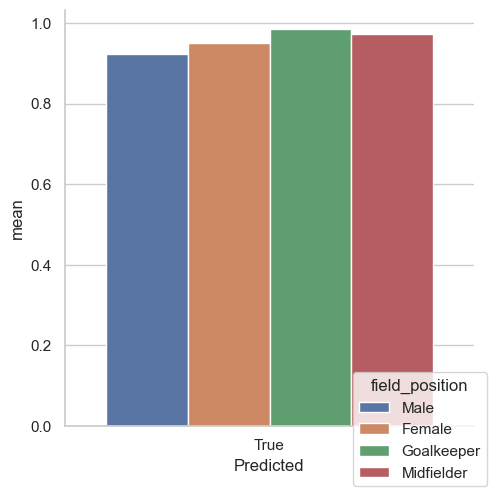

In [43]:
sns.set_theme(style="whitegrid")

p = sns.catplot(data = bias_ds_calibration, kind = "bar", x = "Predicted", y = "mean", hue = "field_position", legend_out = False)
new_labels = ['Male', 'Female']
for t, l in zip(p._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(p, "lower right")

### Error Rate Balance

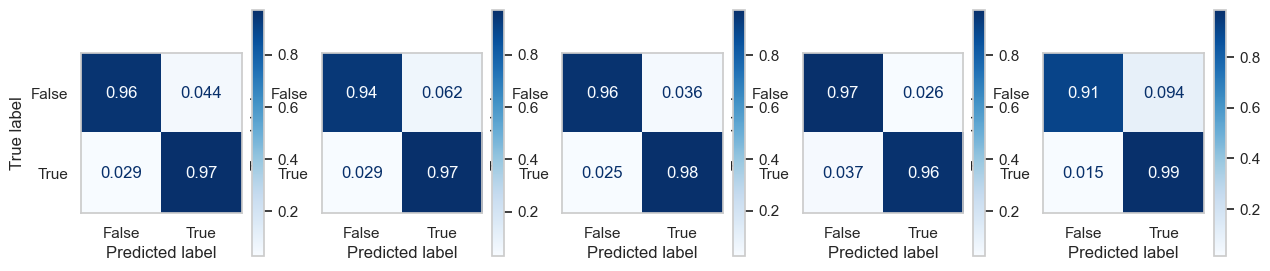

In [1789]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig, axarr = plt.subplots(1, 5, figsize=(15,3.2), sharex = False, sharey = False)

cm1 = confusion_matrix(actual, predictions, labels=clf_class.classes_, normalize = "true")
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=clf_class.classes_)

cm2 = confusion_matrix(actual[group_test == "Attacker"], predictions[group_test == "Attacker"], labels=clf_class.classes_, normalize = "true")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=clf_class.classes_)


cm3 = confusion_matrix(actual[group_test == "Midfielder"], predictions[group_test == "Midfielder"], labels=clf_class.classes_, normalize = "true")
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=clf_class.classes_)

cm4 = confusion_matrix(actual[group_test == "Defender"], predictions[group_test == "Defender"], labels=clf_class.classes_, normalize = "true")
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                              display_labels=clf_class.classes_)

cm5 = confusion_matrix(actual[group_test == "Goalkeeper"], predictions[group_test == "Goalkeeper"], labels=clf_class.classes_, normalize = "true")
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5,
                              display_labels=clf_class.classes_)

disp1.plot(ax=axarr[0], cmap = plt.cm.Blues)
axarr[0].grid(visible=None)

disp2.plot(ax=axarr[1], cmap = plt.cm.Blues)
axarr[1].grid(visible=None)

disp3.plot(ax=axarr[2], cmap = plt.cm.Blues)
axarr[2].grid(visible=None)

disp4.plot(ax=axarr[3], cmap = plt.cm.Blues)
axarr[3].grid(visible=None)

disp5.plot(ax=axarr[4], cmap = plt.cm.Blues)
axarr[4].grid(visible=None)

## Statistical Parity

In [44]:
bias_ds_statParity = bias_ds.groupby(["field_position"], as_index=False)["Predicted"].value_counts(normalize = True) #normalize = True not working sadly

In [45]:
bias_ds_statParity #query it just for true

,field_position,Predicted,proportion
0,Attacker,False,0.572464
1,Attacker,True,0.427536
2,Defender,True,0.548495
3,Defender,False,0.451505
4,Goalkeeper,True,0.626263
5,Goalkeeper,False,0.373737
6,Midfielder,False,0.534591
7,Midfielder,True,0.465409


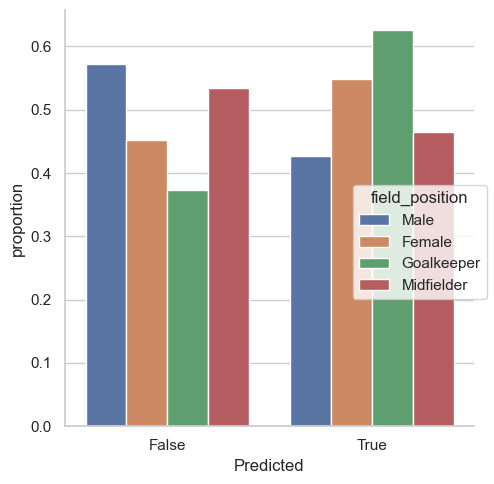

In [49]:
sns.set_theme(style="whitegrid")

p = sns.catplot(data = bias_ds_statParity, kind = "bar", x = "Predicted", y = "proportion", hue = "field_position", legend_out = False)
new_labels = ['Male', 'Female']
for t, l in zip(p._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(p, "center right")

# Tranfer Fee Model

In [21]:
tf_data = pd.read_csv("TM_MV_Club.csv")

In [22]:
#clean column names

tf_data.columns = tf_data.columns.str.replace('.', '_')
tf_data.columns = tf_data.columns.str.replace('___', '_')
tf_data.columns = tf_data.columns.str.replace(' ', '_')

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_37953/61169314.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tf_data.columns = tf_data.columns.str.replace('.', '_')


In [23]:
tf_data.head(3)

,Name,club,name,transfer_fee,Position,league,detailed_position,Squad,AVGage,Foreigners,...,International_reputation,Body_type,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defending_Pace,Physical_Positioning,Years_Left,Club
0,A. Ajeti,West Ham United,A. Ajeti,€11.30m,Forward,Premier League,Centre-Forward,37,26.6,23,...,1,Normal (170-185),79,71,59,69,29,76,3.0,Basel\n
1,A. Cerri,Cagliari Calcio,A. Cerri,€9.00m,Forward,Serie A,Centre-Forward,49,25.9,18,...,1,Normal (185+),62,72,54,68,39,76,4.0,Cagliari\n
2,A. Diawara,AS Roma,A. Diawara,€21.00m,Midfield,Serie A,Defensive Midfield,57,23.7,27,...,2,Lean (170-185),68,54,73,77,72,73,2.0,Napoli\n


In [24]:
tf_data.columns

Index(['Name', 'club', 'name', 'transfer_fee', 'Position', 'league',
       'detailed_position', 'Squad', 'AVGage', 'Foreigners',
       'TotalPlayerValue', 'League_x', 'Pos', 'GP', 'W', 'D', 'L', 'GR', 'GD',
       'Points', 'Age', 'Overall_rating', 'Potential', 'ID', 'Height',
       'Weight', 'foot', 'Best_overall', 'Best_position', 'Growth', 'Joined',
       'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Total_mentality',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Total_defending', 'Marking', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 

In [25]:
tf_data.head(3)

,Name,club,name,transfer_fee,Position,league,detailed_position,Squad,AVGage,Foreigners,...,International_reputation,Body_type,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defending_Pace,Physical_Positioning,Years_Left,Club
0,A. Ajeti,West Ham United,A. Ajeti,€11.30m,Forward,Premier League,Centre-Forward,37,26.6,23,...,1,Normal (170-185),79,71,59,69,29,76,3.0,Basel\n
1,A. Cerri,Cagliari Calcio,A. Cerri,€9.00m,Forward,Serie A,Centre-Forward,49,25.9,18,...,1,Normal (185+),62,72,54,68,39,76,4.0,Cagliari\n
2,A. Diawara,AS Roma,A. Diawara,€21.00m,Midfield,Serie A,Defensive Midfield,57,23.7,27,...,2,Lean (170-185),68,54,73,77,72,73,2.0,Napoli\n


In [26]:
#drop not useful, non-numerical columns
#tf_data = tf_data.dropna(how='any', inplace=True)
tf_data = tf_data.drop(["Name"], axis = 1)
tf_data = tf_data.drop(["club"], axis = 1)
tf_data = tf_data.drop(["Position"], axis = 1)
tf_data = tf_data.drop(["Best_position"], axis = 1)
tf_data = tf_data.drop(["league"], axis = 1)
tf_data = tf_data.drop(["detailed_position"], axis = 1)
tf_data = tf_data.drop(["Squad"], axis = 1)
tf_data = tf_data.drop(["TotalPlayerValue"], axis = 1)
tf_data = tf_data.drop(["GR"], axis = 1)
tf_data = tf_data.drop(["League_x"], axis = 1)
tf_data = tf_data.drop(["Joined"], axis = 1)
tf_data = tf_data.drop(["Loan_date_end"], axis = 1)
tf_data = tf_data.drop(["Release_clause"], axis = 1)
tf_data = tf_data.drop(["Attacking_work_rate"], axis = 1)
tf_data = tf_data.drop(["Defensive_work_rate"], axis = 1)
tf_data = tf_data.drop(["International_reputation"], axis = 1)
tf_data = tf_data.drop(["Body_type"], axis = 1)
tf_data = tf_data.drop(["Club"], axis = 1)
tf_data = tf_data.drop(["name"], axis = 1)
tf_data = tf_data.drop(["foot"], axis = 1)

In [27]:
#clean target vector
tf_data ["transfer_fee"] = tf_data ["transfer_fee"].str.replace('€', '') #regex to remove € and m

# Drop rows that contain loan fee: https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p
tf_data = tf_data[~tf_data .transfer_fee.str.contains("Loan fee:")]

# Multiply all occurrences of "m" by 1 million
tf_data ['transfer_fee'] = tf_data ['transfer_fee'].str.replace('m', '').astype(float) * 1000000

In [31]:
tf_data.columns

Index(['transfer_fee', 'AVGage', 'Foreigners', 'Pos', 'GP', 'W', 'D', 'L',
       'GD', 'Points', 'Age', 'Overall_rating', 'Potential', 'ID', 'Height',
       'Weight', 'Best_overall', 'Growth', 'Value', 'Wage', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Total_mentality',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Total_defending', 'Marking', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Skill_moves', 'Pace_Diving',
       'Shooting_Handling', 'Passing_Kicking

## Feature Analysis (visualizations, relationships w/ each other and with tranfer fee)

In [28]:
#sns.barplot(data = tf_data, x = "position", y = "transfer_fee")

In [29]:
#sns.barplot(data = tf_data, x = "Skill_moves", y = "transfer_fee")

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_37953/3645319522.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = tf_data, x = "Potential", y = "transfer_fee", ci = False)


<AxesSubplot: xlabel='Potential', ylabel='transfer_fee'>

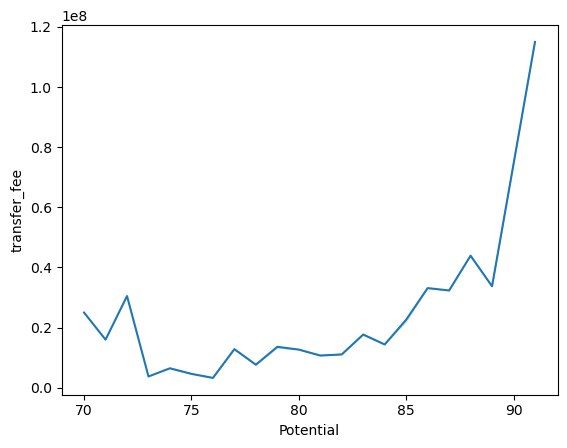

In [33]:
sns.lineplot(data = tf_data, x = "Potential", y = "transfer_fee", ci = False)

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_37953/2614723677.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = tf_data, x = "Value", y = "transfer_fee", ci = False)


<AxesSubplot: xlabel='Value', ylabel='transfer_fee'>

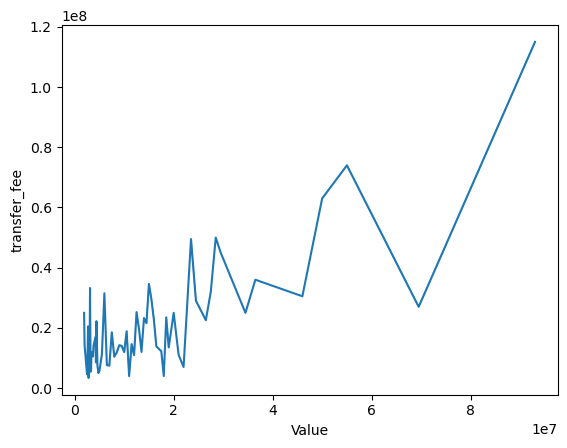

In [35]:
sns.lineplot(data = tf_data, x = "Value", y = "transfer_fee", ci = False)

In [ ]:
pairplot

In [342]:
#try pairplot

In [329]:
tf_data.columns

Index(['transfer_fee', 'AVGage', 'Foreigners', 'Pos', 'GP', 'W', 'D', 'L',
       'GD', 'Points', 'Age', 'Overall_rating', 'Potential', 'ID', 'Height',
       'Weight', 'Best_overall', 'Growth', 'Value', 'Wage', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Total_mentality',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Total_defending', 'Marking', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Skill_moves', 'Pace_Diving',
       'Shooting_Handling', 'Passing_Kicking

In [279]:
from sklearn.model_selection import train_test_split
all_tf_train, all_tf_test = train_test_split(tf_data, test_size = .2, shuffle = True)

In [280]:
# #This makes the accuracy skyrocket and modeling work as expected, but why???
#This is weird!!!
# all_tf_train = all_tf_train.reset_index(drop=True)
# all_tf_test = all_tf_test.reset_index(drop=True)

In [281]:
# all_tf_train=all_tf_train.drop(["level_0"], axis = 1)
# all_tf_train=all_tf_train.drop(["index"], axis = 1)

# all_tf_test=all_tf_test.drop(["level_0"], axis = 1)
# all_tf_test=all_tf_test.drop(["index"], axis = 1)

In [282]:
#getting the feature matrix and target vector
all_tf_train.dropna(how='any', inplace=True)
X_train_fee = all_tf_train.drop(["transfer_fee"], axis = 1)
y_train_fee = all_tf_train["transfer_fee"]

all_tf_test.dropna(how='any', inplace=True)
X_test_fee = all_tf_test.drop(["transfer_fee"], axis = 1)
y_test_fee = all_tf_test["transfer_fee"] # do this to get it by index; want to reset the index

## Model Comparisons + Cross-Validation + Hyperparameter Tuning https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [120]:
from sklearn.linear_model import Lasso
L5 = Lasso(alpha = 1010)
L5.fit(X_train_fee, y_train_fee)
L5.score(X_test_fee, y_test_fee)

/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.831e+16, tolerance: 1.450e+13
  model = cd_fast.enet_coordinate_descent(


0.3451164863267083

In [121]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 5, random_state=0)
regr.fit(X_train_fee, y_train_fee)
regr.score(X_test_fee, y_test_fee)

0.36014667938904654

In [122]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train_fee, y_train_fee)
neigh.score(X_test_fee, y_test_fee)

-0.45651028924742687

In [286]:
#cross-validation
from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(regr, X_train_fee, y_train_fee, cv=5)
print(model_scores.mean())

0.3387909338482892


#### Take-Away: Huge discrepancy between holdout method and cross validation method, due to sample size??? double check with larger dataset, and do an experiment

## Experiment: Holdout Set Vs. Cross-Validation Method comparison by Sample Size, # of features

In [246]:
print(len(X_test_fee.columns))

109
30
71


In [ ]:
#This function helps modify our given feature array by adding column of 1's 
def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

#This function will create both testing and validation data 
def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = 1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

In [ ]:
#choose # of samples and features
n_train = 112
n_val = 27
p_features = 1

#adjusts variability of the data
noise = 0.5

#initialize arrays to store scores
train_score_hist = []
val_score_hist = []


# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)


#Record the score on training and validation as the #features increases
for i in range(n_train-1):
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, i, noise) #create data; #i is the p_features
    lr.fit_analytic(X_train, y_train) #fit
    train_score_hist.append(lr.score(X_train, y_train)) #update model's training score
    val_score_hist.append((lr.score(X_val, y_val))) #update model's validation score
    
#Graph it
num_steps = len(val_score_hist)
plt.plot(np.arange(num_steps) + 1, val_score_hist, label = "val")

num_steps = len(train_score_hist)
plt.plot(np.arange(num_steps) + 1, train_score_hist, label = "train")

plt.ylim([0, 1])
labels = plt.gca().set(title = "Scores vs. Features", xlabel = "# of Features", ylabel = "Score")

In [199]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:



NameError: name 'rf' is not defined

In [ ]:
leaf_size = []

In [102]:
# Create the random grid
random_grid = {'leaf_size': leaf_size,
               'n_neighbors': min_samples_split,
               'p': min_samples_leaf,
               'weights': bootstrap}

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}


In [101]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
SVR = make_pipeline(StandardScaler(), SVR(C=.05, epsilon=0.2))
SVR.fit(X_train_fee, y_train_fee)
SVR.score(X_train_fee, y_train_fee)


-0.08488753917777081

In [98]:
from sklearn.linear_model import Perceptron
per = Perceptron()
per.fit(X_train_fee, y_train_fee)
per.score(X_test_fee, y_test_fee)


0.009259259259259259

## Feature Importance  https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance

## Learning Curves (by models)

In [395]:
X_train_fee.iloc[0:3]

,AVGage,Foreigners,Pos,GP,W,D,L,GD,Points,Age,...,Base_stats,Weak_foot,Skill_moves,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defending_Pace,Physical_Positioning,Years_Left
48,26.4,26,9,38,15,7,16,3,52,24,...,423,4,4,71,70,77,78,61,66,2.0
87,24.4,22,5,38,19,11,8,19,68,20,...,415,3,3,71,70,72,74,64,64,2.0
175,25.4,20,4,38,23,2,13,28,71,20,...,436,2,4,89,75,74,85,40,73,4.0


In [375]:
import warnings
warnings.filterwarnings('ignore')

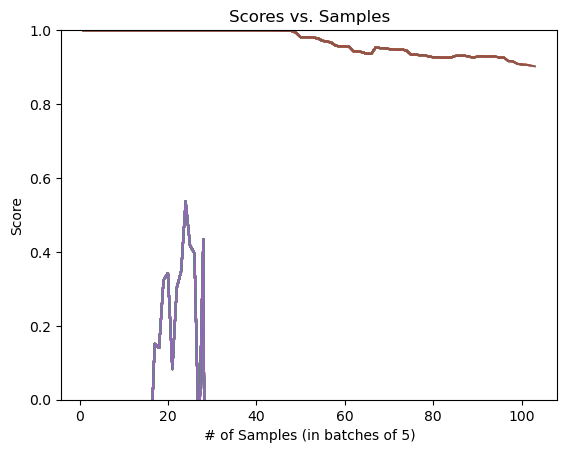

In [399]:
#effect of overfitting, keeping # features constant and increasing samples (good for when we get new dataset);

#effect of overfitting, keeping # samples constant and increasing features (good for when we get new dataset);


#initialize arrays to store scores
train_score_hist = []
cv_score_hist = []


#loop through samples:
for i in range(5, len(X_train_fee)):
    #fit on training; I don't think I should refit everytime!!!!!
    L6 = Lasso(alpha = 1) 
    L6.fit(X_train_fee.iloc[0:i], y_train_fee.iloc[0:i])
    
    #score on training
    #print(L6.score(X_train_fee.iloc[0:i],y_train_fee.iloc[0:i]))
    train_score_hist.append(L6.score(X_train_fee.iloc[0:i],y_train_fee.iloc[0:i]))  #update model's training score
    
    #cross-validation
    cv_score_hist.append(cross_val_score(L6, X_train_fee.iloc[0:i], y_train_fee.iloc[0:i], cv=5).mean())
 

    #Graph it
    num_steps = len(train_score_hist)
    plt.plot(np.arange(num_steps) + 1, cv_score_hist, label = "cross_val")

    num_steps = len(train_score_hist)
    plt.plot(np.arange(num_steps) + 1, train_score_hist, label = "train")

    plt.ylim([0, 1])
    #change x to be in batches of 5
    labels = plt.gca().set(title = "Scores vs. Samples", xlabel = "# of Samples (in batches of 5)", ylabel = "Score")


    
#loop through features:

#for i in rang

#effect of overfitting, w/ our # of samples, changing the number of features 

In [ ]:
#loop through number of samples, checking training and validation score for each...

#if training score is still increasing by the time we reach last sample then we probably need more training data

In [326]:
#choose # of samples and features
n_train = 100
n_val = 100
p_features = 1

#adjusts variability of the data
noise = 0.5

#initialize arrays to store scores
train_score_hist = []
val_score_hist = []


# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

print(X_train)

#Record the score on training and validation as the #features increases
for i in range(n_train-1):
    #X_train, y_train, X_val, y_val = LR_data(n_train, n_val, i, noise) #create data; #i is the p_features
    lr.fit_analytic(X_train, y_train) #fit
    #train_score_hist.append(lr.score(X_train, y_train)) #update model's training score
    val_score_hist.append((lr.score(X_val, y_val))) #update model's validation score
    
#Graph it
num_steps = len(val_score_hist)
plt.plot(np.arange(num_steps) + 1, val_score_hist, label = "val")

num_steps = len(train_score_hist)
plt.plot(np.arange(num_steps) + 1, train_score_hist, label = "train")

plt.ylim([0, 1])
labels = plt.gca().set(title = "Scores vs. Features", xlabel = "# of Features", ylabel = "Score")



NameError: name 'LR_data' is not defined

In [1010]:
#should we focus on optimizing this model for rn?
#or
#add real player stats (not collected yet) and try to switch out target vector to tranfermrkt.com values (still subjective, not collected)
###just testing how good fifa's predictions are compared to tranfsermrkt.com; ehh

#I THINK THIS IS THE MOVE; #COSIGNED BY PHIL + DO MACHINE LEARNY STUFF
#add (merge) club data (collected) and try to predict transfer fees (not collected) for that year; not every player has tranfer fees (target vector will be smaller than #samples)
#do we have to tailor make the test set to only include players that have tranfer fees?? eh
#use all players for training, but only players with tranfer fees for testing
#gonna be hard to get tranfer fees on here



#250 available, but we have over 1400 players in our 


#misc: is it cheating to train multiple times and choose the training set that produces best parameter vector (based on score on validation test)


#completely different problem but it's ok

#Do some experimentation stuff w/ different models, etc.s



# Tranfer Fee Model with updated dataset

# - TRY IT ON SEPARATE POSITIONS

# - TRY IT WITH ONLY PLAYER DATA

# - TRY IT WITH ONLY CLUB DATA

# - LOOK INTO NEURAL NETWORK

In [1104]:
tf2_data = pd.read_csv("transfer fee_final.csv")

In [1241]:
tf2_data.shape

(619, 78)

In [1105]:
#clean column names

tf2_data.columns = tf2_data.columns.str.replace('.', '_')
tf2_data.columns = tf2_data.columns.str.replace('___', '_')
tf2_data.columns = tf2_data.columns.str.replace(' ', '_')

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_25712/987462435.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tf2_data.columns = tf2_data.columns.str.replace('.', '_')


In [1106]:
tf2_data.head(5)

,age,fee_cleaned,value_eur,years_left,team,player_name,overall,potential,wage_eur,nationality_name,...,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,SPI,tranfer_activity
0,27,13.0,20500000.0,2.0,Barcelona,Jasper Cillessen,82,85,150000.0,Netherlands,...,33.285940,66.191080,6.012152,15.064390,570,163,94.3800,3.3800,67.72,-487
1,22,16.5,6000000.0,1.0,Barcelona,Lucas Digne,76,81,70000.0,France,...,33.285940,66.191080,6.012152,15.064390,570,163,94.3800,3.3800,67.72,-487
2,25,1.5,3300000.0,1.0,Eibar,Florian Lejeune,73,78,35000.0,France,...,47.452420,-0.608427,7.804410,7.974349,191,218,54.0253,11.0253,67.72,-487
3,27,4.0,3900000.0,3.0,Granada,Mehdi Carcela-González,74,76,60000.0,Morocco,...,58.658524,-22.508105,8.999245,7.241976,117,268,38.4994,-0.5006,67.72,-487
4,29,0.0,8000000.0,0.0,Las Palmas,Kevin-Prince Boateng,78,78,100000.0,Ghana,...,56.263722,-21.314619,10.079552,8.927858,228,250,41.1793,-2.8207,67.72,-487


In [1107]:
#turn fee_cleaned to millions
tf2_data["fee_cleaned"] = tf2_data["fee_cleaned"]* 1000000

In [1108]:
tf2_data.columns

Index(['age', 'fee_cleaned', 'value_eur', 'years_left', 'team', 'player_name',
       'overall', 'potential', 'wage_eur', 'nationality_name', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_divin

In [1109]:
#getting gk datasets
tf2_data_gk_index = tf2_data["position_x"] == "Goalkeeper"
tf2_data_gk = tf2_data[tf2_data_gk_index]

In [1110]:
tf2_data_gk = tf2_data_gk.dropna(axis = 1)

In [1111]:
tf2_data_gk.to_csv('tf_gk.csv', index=False)

In [1112]:
tf2_data_gk.head(3)

,age,fee_cleaned,value_eur,years_left,team,player_name,overall,potential,wage_eur,nationality_name,...,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,SPI,tranfer_activity
0,27,13000000.0,20500000.0,2.0,Barcelona,Jasper Cillessen,82,85,150000.0,Netherlands,...,33.285940,66.191080,6.012152,15.064390,570,163,94.3800,3.3800,67.72,-487
10,25,1000000.0,2500000.0,2.0,Eibar,Marko Dmitrović,72,78,6000.0,Serbia,...,40.710463,-3.817782,7.821400,9.458058,157,218,50.0492,-3.9508,67.72,-487
12,27,0.0,1300000.0,0.0,Las Palmas,Leandro Chichizola,70,72,3000.0,Argentina,...,50.218214,-13.880975,10.230977,10.034512,270,211,42.1085,3.1085,67.72,-487


In [1113]:
#getting data for other players
tf2_data_field_index = tf2_data["position_x"] != "Goalkeeper"
tf2_data_field = tf2_data[tf2_data_field_index]

tf2_data_field_index_2 = tf2_data_field["fee_cleaned"] > 0
tf2_data_field = tf2_data_field[tf2_data_field_index_2]

tf2_data_field = tf2_data_field.dropna()

In [1114]:
tf2_data_field.columns

Index(['age', 'fee_cleaned', 'value_eur', 'years_left', 'team', 'player_name',
       'overall', 'potential', 'wage_eur', 'nationality_name', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_divin

## Feature Engineering

In [1115]:
buyer_avg_tf = tf2_data_field.groupby("team")["fee_cleaned"].mean()
seller_avg_tf = tf2_data_field.groupby("club_involved_name")["fee_cleaned"].mean()

In [1116]:
#left-merge based on "team names"; preserves all rows of tf2_data_field and merges with buyer_avg_tf on matches on "team"
tf2_data_field = pd.merge(tf2_data_field, buyer_avg_tf, on='team', how='left', suffixes=('', '_buyer_avg'))
tf2_data_field = pd.merge(tf2_data_field, seller_avg_tf, on='club_involved_name', how='left', suffixes=('', '_seller_avg'))

In [1117]:
tf2_data_field.columns

Index(['age', 'fee_cleaned', 'value_eur', 'years_left', 'team', 'player_name',
       'overall', 'potential', 'wage_eur', 'nationality_name', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_divin

In [1118]:
#tf2_data_field.to_csv('tf_field.csv', index=False)

# FEATURE SELECTION!!!!!!

In [1119]:
# try select from model, and RFE; compare

## Modeling

In [1120]:
#standardize 

In [1140]:
from sklearn.model_selection import train_test_split
field_tf_upd_train, field_tf_upd_test = train_test_split(tf2_data_field, test_size = .2, shuffle = True)

In [1141]:
# #This makes the accuracy skyrocket and modeling work as expected, but why???
#This is weird!!!
# all_tf_train = all_tf_train.reset_index(drop=True)
# all_tf_test = all_tf_test.reset_index(drop=True)

In [1142]:
# all_tf_train=all_tf_train.drop(["level_0"], axis = 1)
# all_tf_train=all_tf_train.drop(["index"], axis = 1)

# all_tf_test=all_tf_test.drop(["level_0"], axis = 1)
# all_tf_test=all_tf_test.drop(["index"], axis = 1)

In [1143]:
(field_tf_upd_train.columns)

Index(['age', 'fee_cleaned', 'value_eur', 'years_left', 'team', 'player_name',
       'overall', 'potential', 'wage_eur', 'nationality_name', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_divin

In [1144]:
(field_tf_upd_train.columns)

Index(['age', 'fee_cleaned', 'value_eur', 'years_left', 'team', 'player_name',
       'overall', 'potential', 'wage_eur', 'nationality_name', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_divin

In [1145]:
#getting the feature matrix and target vector
# field_tf_upd_train = field_tf_upd_train[field_tf_upd_train.columns[0:8]] #use this!!!
# field_tf_upd_test = field_tf_upd_test[field_tf_upd_test.columns[0:8]] #use this!!!



#re-clean; non-numerical stuff
field_tf_upd_train = field_tf_upd_train.drop(["team"], axis = 1)
field_tf_upd_train = field_tf_upd_train.drop(["player_name"], axis = 1)
field_tf_upd_train = field_tf_upd_train.drop(["nationality_name"], axis = 1)
field_tf_upd_train = field_tf_upd_train.drop(["position_x"], axis = 1)
field_tf_upd_train = field_tf_upd_train.drop(["league_name_x_y"], axis = 1)
field_tf_upd_train = field_tf_upd_train.drop(["club_involved_name"], axis = 1)

#re-clean; non-numerical stuff
field_tf_upd_test = field_tf_upd_test.drop(["team"], axis = 1)
field_tf_upd_test = field_tf_upd_test.drop(["player_name"], axis = 1)
field_tf_upd_test = field_tf_upd_test.drop(["nationality_name"], axis = 1)
field_tf_upd_test = field_tf_upd_test.drop(["position_x"], axis = 1)
field_tf_upd_test = field_tf_upd_test.drop(["league_name_x_y"], axis = 1)
field_tf_upd_test = field_tf_upd_test.drop(["club_involved_name"], axis = 1)

#standardized and back to df
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
field_tf_upd_train = pd.DataFrame(sc.fit_transform(field_tf_upd_train), columns = field_tf_upd_train.columns)


sc = StandardScaler()
field_tf_upd_test = pd.DataFrame(sc.fit_transform(field_tf_upd_test), columns = field_tf_upd_test.columns)


X_train_fee = field_tf_upd_train.drop(["fee_cleaned"], axis = 1)
y_train_fee = field_tf_upd_train["fee_cleaned"]

X_test_fee = field_tf_upd_test.drop(["fee_cleaned"], axis = 1)
y_test_fee = field_tf_upd_test["fee_cleaned"] # do this to get it by index; want to reset the index

In [1146]:
#re-clean; non-numerical stuff
y_test_fee

0    -0.540994
1     0.898611
2     1.653525
3    -0.593662
4    -0.523438
        ...   
88   -0.641942
89    0.578211
90   -0.497103
91    0.104195
92    2.303102
Name: fee_cleaned, Length: 93, dtype: float64

In [1147]:
###Feature selection!!!

## Filter Method: Univariate; mutual_info_regression + select_k_best; https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a

In [1148]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train_fee, y_train_fee)
mutual_info

array([0.06140521, 0.16601365, 0.06534044, 0.21733083, 0.27810313,
       0.07103108, 0.        , 0.02954555, 0.        , 0.01797039,
       0.        , 0.04293432, 0.10208587, 0.        , 0.01743957,
       0.00980448, 0.01652579, 0.        , 0.11186243, 0.03405597,
       0.09777313, 0.        , 0.02340049, 0.08007305, 0.04200938,
       0.0569941 , 0.00319484, 0.        , 0.01022845, 0.        ,
       0.0724528 , 0.00450313, 0.03829336, 0.        , 0.        ,
       0.        , 0.00357991, 0.        , 0.06481514, 0.02114354,
       0.00609266, 0.04302202, 0.01741776, 0.        , 0.0393703 ,
       0.01690561, 0.03496363, 0.        , 0.05102206, 0.03658436,
       0.16863551, 0.04238855, 0.04910783, 0.10024891, 0.13923198,
       0.13050872, 0.13612773, 0.02632823, 0.09887561, 0.09505542,
       0.        , 0.05232386, 0.15178415, 0.04349012, 0.14485113,
       0.10995737, 0.07480534, 0.17251336, 0.08536388, 0.12027134,
       0.1508335 , 0.3669649 , 0.48199136])

In [1149]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_fee.columns
mutual_info.sort_values(ascending=False)

fee_cleaned_seller_avg      0.481991
fee_cleaned_buyer_avg       0.366965
potential                   0.278103
overall                     0.217331
xpts                        0.172513
                              ...   
power_long_shots            0.000000
international_reputation    0.000000
power_strength              0.000000
weak_foot                   0.000000
movement_balance            0.000000
Length: 73, dtype: float64

<AxesSubplot: >

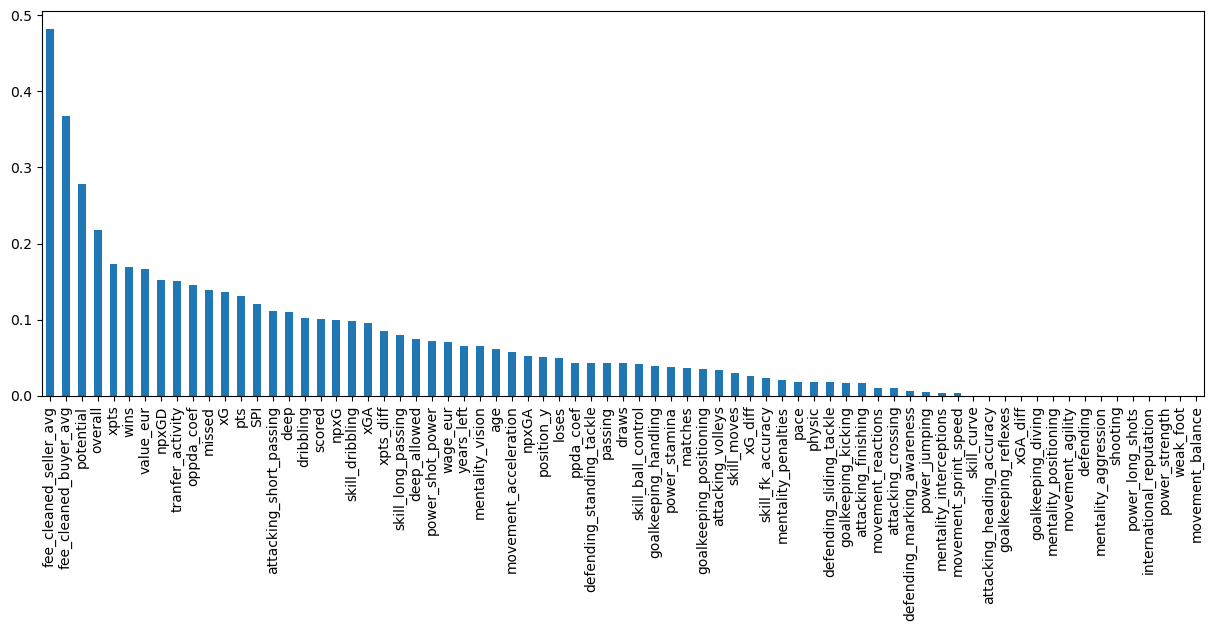

In [1150]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [1151]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=30)
selected_top_columns.fit(X_train_fee, y_train_fee)
selected_top_columns.get_support()

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True])

In [1152]:
X_train_fee.columns[selected_top_columns.get_support()]

Index(['value_eur', 'overall', 'potential', 'dribbling',
       'attacking_short_passing', 'skill_dribbling', 'power_shot_power',
       'wins', 'scored', 'missed', 'pts', 'xG', 'npxG', 'xGA', 'npxGD',
       'oppda_coef', 'deep', 'xpts', 'SPI', 'tranfer_activity',
       'fee_cleaned_buyer_avg', 'fee_cleaned_seller_avg'],
      dtype='object')

In [1153]:
# X_train_fee = X_train_fee[['value_eur', 'overall', 'potential', 'dribbling',
#        'attacking_short_passing', 'mentality_vision', 'position_y', 'wins',
#        'missed', 'pts', 'xG', 'npxG', 'xGA', 'npxGD', 'oppda_coef', 'deep',
#        'xpts', 'xpts_diff', 'SPI', 'tranfer_activity', 'fee_cleaned_buyer_avg',
#        'fee_cleaned_seller_avg']]

# X_test_fee = X_test_fee[['value_eur', 'overall', 'potential', 'dribbling',
#        'attacking_short_passing', 'mentality_vision', 'position_y', 'wins',
#        'missed', 'pts', 'xG', 'npxG', 'xGA', 'npxGD', 'oppda_coef', 'deep',
#        'xpts', 'xpts_diff', 'SPI', 'tranfer_activity', 'fee_cleaned_buyer_avg',
#        'fee_cleaned_seller_avg']]

In [1154]:
### Normal LR, performs worse without the filter feature selection; visual?

In [1162]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_fee, y_train_fee)
lr.score(X_test_fee, y_test_fee)

-9.137833556461276e+22

In [1163]:
from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(lr, X_train_fee, y_train_fee, cv=10)
print(model_scores.mean())

0.46109691957281057


## Embedded Methods NEXT: Deal w/ multi-collinearity and how they compare with perfomance to filter methods.

In [ ]:
#LASSO for feature selection, Ridge to deal w/ multi-collinearity

In [1161]:
#normalize (standardize) data; important for interpreting linear model's coefficients b/cuz the penalties are dependent on scale


from sklearn.linear_model import Lasso
Lassolr99 = Lasso(alpha = 0.001)
Lassolr99.fit(X_train_fee, y_train_fee)
print(Lassolr99.score(X_test_fee, y_test_fee))
model_scores = cross_val_score(Lassolr99, X_train_fee, y_train_fee, cv=10)
print(model_scores.mean())

lassolr_coefs = Lassolr99.coef_

print(Lassolr99.coef_)


sorted_ascend_params = np.argsort(lassolr_coefs) #Returns the indices that would sort an array in ascending order
sorted_descend_params = list(reversed(sorted_ascend_params))

print("Top 5 features that contribute the most to increased ridership as determined by our model:")
print(X_train_fee.columns[sorted_descend_params[:7]])

#least important ones
print("Top 5 features that contribute the most to increased ridership as determined by our model:")
print(X_train_fee.columns[sorted_descend_params[-7:]])

#Select from model if we were passing it into lr again




#try ridge after filtering. could be useful here
from sklearn.linear_model import Ridge
Ridgelr99 = Ridge(alpha = 0.001)
Ridgelr99.fit(X_train_fee, y_train_fee)
print(Ridgelr99.score(X_test_fee, y_test_fee))
model_scores = cross_val_score(Ridgelr99, X_train_fee, y_train_fee, cv=10)
print(model_scores.mean())

Ridgelr_coefs = Ridgelr99.coef_

print(Ridgelr99.coef_)


sorted_ascend_params = np.argsort(Ridgelr_coefs) #Returns the indices that would sort an array in ascending order
sorted_descend_params = list(reversed(sorted_ascend_params))

print("Top 5 features that contribute the most to increased ridership as determined by our model:")
print(X_train_fee.columns[sorted_descend_params[:7]])


#Visualize this bs



/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.355e-01, tolerance: 3.710e-02
  model = cd_fast.enet_coordinate_descent(
/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.533e+00, tolerance: 3.591e-02
  model = cd_fast.enet_coordinate_descent(
/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

0.6326946986830565
0.5269105346492341
[-0.14527239  0.3391495   0.06832156 -0.         -0.01412643  0.02027054
  0.          0.02103855 -0.0618164   0.         -0.          0.
  0.         -0.05876085  0.01132432  0.         -0.01270197  0.0379696
  0.08288134 -0.          0.0646166  -0.0853399   0.05949397  0.06688571
 -0.05978003  0.          0.01386636  0.03977887  0.06692626 -0.03923601
 -0.04041929 -0.03209752 -0.          0.09176602  0.03667559 -0.03605972
 -0.0485681   0.03614434 -0.15571973  0.04758417  0.13869602 -0.11466329
  0.02394841 -0.00245946 -0.00221047  0.01830526  0.00835758 -0.05386343
  0.09281127  0.          0.          0.00386736 -0.01349202 -0.13498292
  0.04256252  0.22801449 -0.3163314   0.          0.14437345  0.26852705
 -0.         -0.04282903  0.25019091 -0.01320786 -0.08391027 -0.
  0.0059226   0.04282215 -0.          0.00112779  0.04693377  0.5614803
  0.20251686]
Top 5 features that contribute the most to increased ridership as determined by our model:

/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.485e-01, tolerance: 3.569e-02
  model = cd_fast.enet_coordinate_descent(
/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.067e-01, tolerance: 3.544e-02
  model = cd_fast.enet_coordinate_descent(
/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

In [1167]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 15, random_state=0)
regr.fit(X_train_fee, y_train_fee)
print(regr.score(X_test_fee, y_test_fee))

# Get numerical feature importances
importances = list(regr.feature_importances_)

sorted_ascend_params = np.argsort(importances) #Returns the indices that would sort an array in ascending order
sorted_descend_params = list(reversed(sorted_ascend_params))

print("Top 5 features that contribute the most to increased ridership as determined by our model:")
print(X_train_fee.columns[sorted_descend_params[:7]])



0.690159519441609
[0.0029430709626093103, 0.019878019867128893, 0.0065136659012314, 0.0035512911570240433, 0.08754677653889899, 0.005321814566283382, 0.0005100550041276557, 0.0012436684658374386, 0.000572955550292345, 0.0025772328547252464, 0.0035821357861577506, 0.004755633643974279, 0.010273669770750183, 0.002410547236474721, 0.0031048318034732608, 0.0028844772455016016, 0.002461942356580405, 0.0018274519689443494, 0.003461195165387428, 0.002823904617893299, 0.04460422142298988, 0.004174720834603062, 0.0042891170710324415, 0.006991907264893839, 0.023083329750097577, 0.0013588855562866233, 0.001998550535738904, 0.004821940913181499, 0.007849986027259503, 0.00139046946833093, 0.002225613858643151, 0.002622094697078472, 0.0035468216135394496, 0.010154047698174684, 0.0012275045600910746, 0.003886874174328335, 0.0027608824356654843, 0.0016264136773248184, 0.009896473935294895, 0.006162202238252174, 0.002088640319982225, 0.001615812437681501, 0.003375581517479506, 0.002952292455628043, 0.0

In [462]:
from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(regr, X_train_fee, y_train_fee, cv=5)
print(model_scores.mean())

0.6898849748733976


In [463]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

reg_lin = ElasticNet(random_state=0)
reg_lin.fit(X_train_fee, y_train_fee)
reg_lin.score(X_test_fee, y_test_fee)

/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+16, tolerance: 1.385e+13
  model = cd_fast.enet_coordinate_descent(


0.6599095906238384

In [464]:
from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(reg_lin, X_train_fee, y_train_fee, cv=5)
print(model_scores.mean())

0.6701905441668442


/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.477e+16, tolerance: 1.036e+13
  model = cd_fast.enet_coordinate_descent(
/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.183e+16, tolerance: 9.860e+12
  model = cd_fast.enet_coordinate_descent(
/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

In [458]:
from sklearn.ensemble import GradientBoostingRegressor
xgb = GradientBoostingRegressor(n_estimators=10, learning_rate=1.0,
    max_depth=8, random_state=4)
xgb.fit(X_train_fee, y_train_fee)
xgb.score(X_test_fee, y_test_fee)

0.014331232626567547

In [459]:
from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(xgb, X_train_fee, y_train_fee, cv=5)
print(model_scores.mean())

0.33194068747855693


## Model Comparisons + Cross-Validation + Hyperparameter Tuning https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

## Bias Audit: Nationality

In [1228]:
#new dataset with only these 5 coountries
#avg. tf for all these countries

#use England, Italy, Germany, France (European soccer powerhouses)

bias_tf_ds = tf2_data_field[tf2_data_field['nationality_name'].isin(['England', "Italy", "Germany","France"])]


In [1229]:
bias_tf_ds

,age,fee_cleaned,value_eur,years_left,team,player_name,overall,potential,wage_eur,nationality_name,...,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,SPI,tranfer_activity,fee_cleaned_buyer_avg,fee_cleaned_seller_avg
0,22,16500000.0,6000000.0,1.0,Barcelona,Lucas Digne,76,81,70000.0,France,...,6.012152,15.064390,570,163,94.3800,3.3800,67.72,-487,7.260000e+07,1.650000e+07
1,25,1500000.0,3300000.0,1.0,Eibar,Florian Lejeune,73,78,35000.0,France,...,7.804410,7.974349,191,218,54.0253,11.0253,67.72,-487,1.500000e+06,8.250000e+06
3,25,9500000.0,11500000.0,1.0,Sevilla,Wissam Ben Yedder,78,82,50000.0,France,...,8.600500,8.957718,296,216,63.6363,11.6363,67.72,-487,1.121818e+07,9.500000e+06
4,25,13750000.0,4800000.0,1.0,Villarreal,Roberto Soriano,74,81,35000.0,Italy,...,9.924386,9.034772,188,215,52.1071,-11.8929,67.72,-487,1.064167e+07,5.031250e+06
6,20,140000000.0,12000000.0,4.0,Barcelona,Ousmane Dembélé,77,90,30000.0,France,...,6.702330,15.710111,552,144,87.9535,-2.0465,67.72,-487,7.260000e+07,2.717308e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,25,5500000.0,2100000.0,2.0,Sampdoria,Antonino La Gumina,67,74,6000.0,Italy,...,12.133074,9.035652,138,205,31.1239,-4.8761,62.98,-804,3.832759e+06,1.075000e+07
455,29,5500000.0,1900000.0,1.0,Sampdoria,Ernesto Torregrossa,71,71,4000.0,Italy,...,12.133074,9.035652,138,205,31.1239,-4.8761,62.98,-804,3.832759e+06,7.466667e+06
456,34,2500000.0,9000000.0,1.0,Sampdoria,Antonio Candreva,78,78,85000.0,Italy,...,12.133074,9.035652,138,205,31.1239,-4.8761,62.98,-804,3.832759e+06,5.300000e+06
457,34,500000.0,14000000.0,1.0,Sampdoria,Francesco Caputo,79,79,42000.0,Italy,...,12.133074,9.035652,138,205,31.1239,-4.8761,62.98,-804,3.832759e+06,6.875000e+06


In [1230]:
bias_tf_ds.groupby("nationality_name")["fee_cleaned"].mean()

nationality_name
England    2.267250e+07
France     1.879365e+07
Germany    8.319786e+06
Italy      7.475464e+06
Name: fee_cleaned, dtype: float64

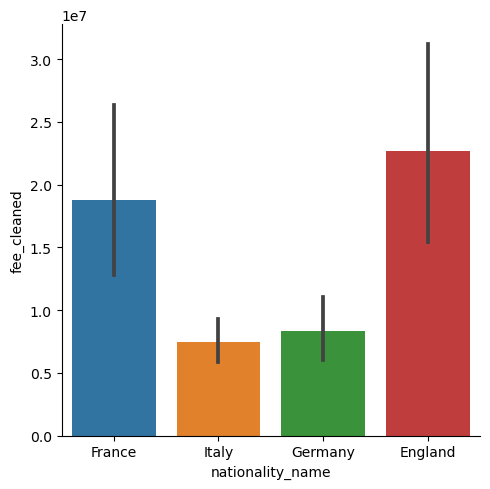

In [1231]:
p = sns.catplot(data = bias_tf_ds, kind = "bar", x = "nationality_name", y = "fee_cleaned", legend_out = False)

In [1232]:
## How do we choose the threshold for market value?; we could do an even tier system??

In [1233]:
mean_tf = bias_tf_ds["fee_cleaned"].mean() #use the mean i guess

In [1234]:
#bias_tf_ds["fee_cleaned"].median() #use the median, maybe; there's some crazy outliers pushing the mean up i guess; there is, but that's a part of soccer lol

In [1235]:
#add value threshold and drop value, drop nationality (need a dataset with nationality), predict value threshold

In [1236]:
bias_tf_ds["fee_cleaned_threshold"] = bias_tf_ds['fee_cleaned'] < mean_tf

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_25712/4004488856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bias_tf_ds["fee_cleaned_threshold"] = bias_tf_ds['fee_cleaned'] < mean_tf


In [30]:
#use classification model, try different ones

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf_class = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_class.fit(X_train_all, y_train_all)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [32]:
clf_class.score(X_test_all, y_test_all)

0.9586693548387096

In [33]:
#gather predictions
predictions = clf_class.predict(X_test_all)
actual = y_test_all

In [34]:
(predictions == actual).mean()

0.9586693548387096

In [35]:
bias_ds = all_test.copy()
bias_ds.rename(columns={'ValueThreshold':'Actual'}, inplace=True) #rename ValueThreshold to Actual
bias_ds["Predicted"] = predictions

In [36]:
bias_ds.head(3)

,Name,Age,Overall_rating,Potential,Years_Left,field_position,Total_stats,Value,Wage,Release_clause,...,Weak_foot,Skill_moves,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defending_Pace,Physical_Positioning,Actual,Predicted
1262,G. Castro,31,76,76,2.0,Midfielder,2055,6500000.0,30000.0,11100000.0,...,4,3,67,69,77,77,68,66,False,False
1730,A. Maier,19,75,87,3.0,Midfielder,1836,11500000.0,10000.0,21900000.0,...,3,3,69,56,72,74,68,69,False,False
227,Casillas,37,83,83,1.0,Goalkeeper,1306,1700000.0,10000.0,3500000.0,...,2,1,87,76,61,84,55,85,True,False


In [37]:
group_test = bias_ds["field_position"]

In [38]:
group_test == "Attacker"

1262    False
1730    False
227     False
3121    False
4965    False
        ...  
4699    False
3944    False
3858     True
1696    False
3533    False
Name: field_position, Length: 992, dtype: bool

### Calibration

As defined by Chouldechova in [this paper](https://via.hypothes.is/https://arxiv.org/pdf/1703.00056.pdf), "a score S = S(x) is said to be well-calibrated if it reflects the same
likelihood of recidivism irrespective of the individuals’ group membership."

In our context, when we are doing binary classification for sex-based income, the calibration takes on the form of the PPV.
Namely, our model would be well-calibrated if the fraction of predicted individuals making >\\$50k who actually make >\\$50k is the same across groups.

In [ ]:
bias_ds_calibration = bias_ds.query("Predicted == True")

In [ ]:
bias_ds_calibration = bias_ds_calibration.groupby(["field_position", "Predicted"])["Actual"].mean().reset_index(name = "mean")

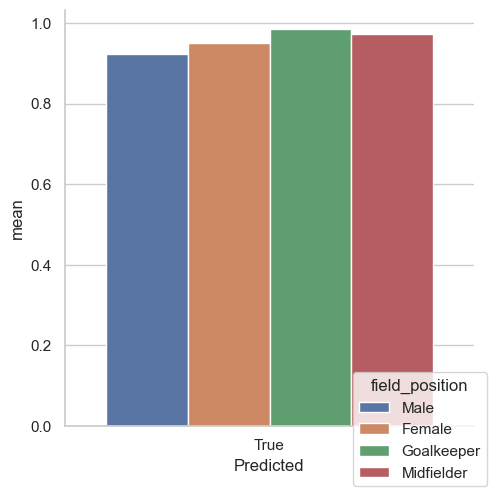

In [ ]:
sns.set_theme(style="whitegrid")

p = sns.catplot(data = bias_ds_calibration, kind = "bar", x = "Predicted", y = "mean", hue = "field_position", legend_out = False)
new_labels = ['Male', 'Female']
for t, l in zip(p._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(p, "lower right")

### Error Rate Balance

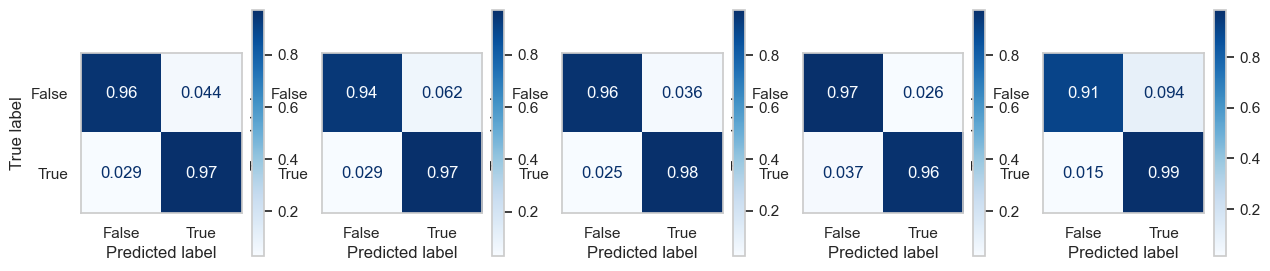

In [1789]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig, axarr = plt.subplots(1, 5, figsize=(15,3.2), sharex = False, sharey = False)

cm1 = confusion_matrix(actual, predictions, labels=clf_class.classes_, normalize = "true")
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=clf_class.classes_)

cm2 = confusion_matrix(actual[group_test == "Attacker"], predictions[group_test == "Attacker"], labels=clf_class.classes_, normalize = "true")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=clf_class.classes_)


cm3 = confusion_matrix(actual[group_test == "Midfielder"], predictions[group_test == "Midfielder"], labels=clf_class.classes_, normalize = "true")
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=clf_class.classes_)

cm4 = confusion_matrix(actual[group_test == "Defender"], predictions[group_test == "Defender"], labels=clf_class.classes_, normalize = "true")
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                              display_labels=clf_class.classes_)

cm5 = confusion_matrix(actual[group_test == "Goalkeeper"], predictions[group_test == "Goalkeeper"], labels=clf_class.classes_, normalize = "true")
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5,
                              display_labels=clf_class.classes_)

disp1.plot(ax=axarr[0], cmap = plt.cm.Blues)
axarr[0].grid(visible=None)

disp2.plot(ax=axarr[1], cmap = plt.cm.Blues)
axarr[1].grid(visible=None)

disp3.plot(ax=axarr[2], cmap = plt.cm.Blues)
axarr[2].grid(visible=None)

disp4.plot(ax=axarr[3], cmap = plt.cm.Blues)
axarr[3].grid(visible=None)

disp5.plot(ax=axarr[4], cmap = plt.cm.Blues)
axarr[4].grid(visible=None)

## Statistical Parity

In [44]:
bias_ds_statParity = bias_ds.groupby(["field_position"], as_index=False)["Predicted"].value_counts(normalize = True) #normalize = True not working sadly

In [45]:
bias_ds_statParity #query it just for true

,field_position,Predicted,proportion
0,Attacker,False,0.572464
1,Attacker,True,0.427536
2,Defender,True,0.548495
3,Defender,False,0.451505
4,Goalkeeper,True,0.626263
5,Goalkeeper,False,0.373737
6,Midfielder,False,0.534591
7,Midfielder,True,0.465409


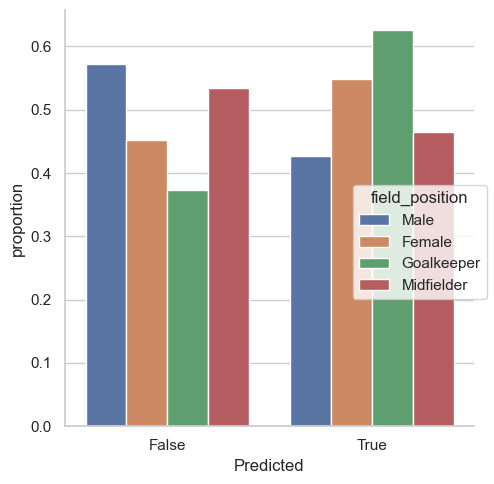

In [49]:
sns.set_theme(style="whitegrid")

p = sns.catplot(data = bias_ds_statParity, kind = "bar", x = "Predicted", y = "proportion", hue = "field_position", legend_out = False)
new_labels = ['Male', 'Female']
for t, l in zip(p._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(p, "center right")

In [ ]:
#Motivation



<AxesSubplot: xlabel='nationality_name', ylabel='fee_cleaned'>

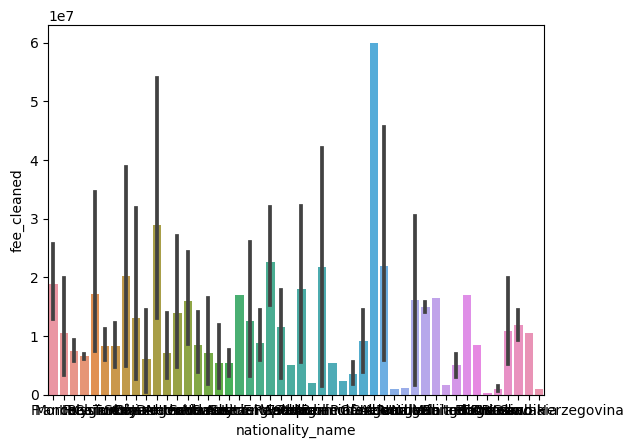

In [140]:
sns.barplot(data =tf2_data_field , x = "nationality_name", y = "fee_cleaned") #just pick the top 5 from the article, groupby -> new dataset

In [ ]:
#need a threshold or tiers

In [ ]:
#base rates



#is the model biased to give them higher transfer fee predictions

<AxesSubplot: xlabel='age', ylabel='fee_cleaned'>

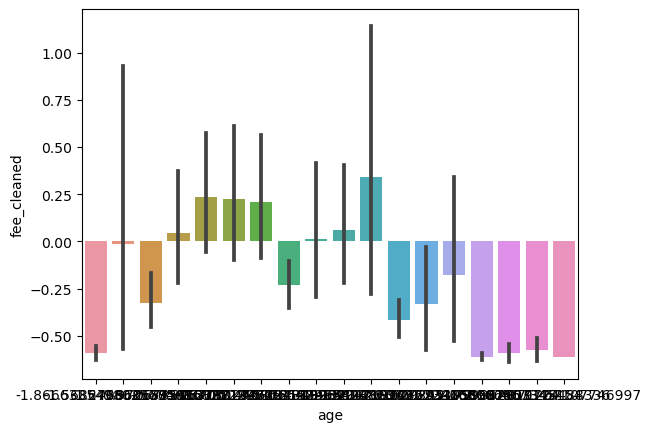

In [1247]:
sns.barplot(data = field_tf_upd_train, x = "age", y = "fee_cleaned")

<AxesSubplot: xlabel='Skill_moves', ylabel='Value'>

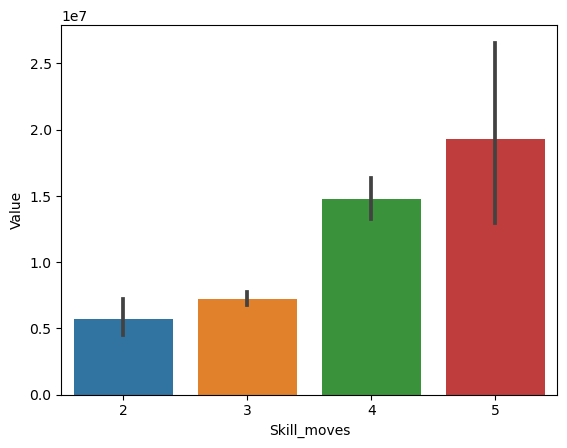

In [198]:
sns.barplot(data = train, x = "Skill_moves", y = "Value")

<AxesSubplot: xlabel='pace', ylabel='fee_cleaned'>

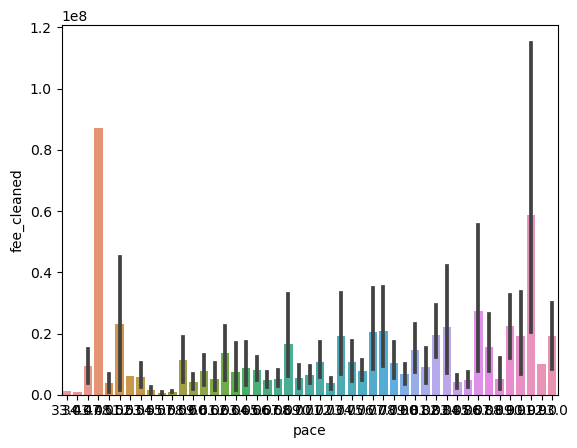

In [410]:
sns.barplot(data = field_tf_upd_train, x = "pace", y = "fee_cleaned")